1
1
1
1.044947754
1.048338979
1.045820092
1.223025188
1.175336317
1.166633613
1.298620783
1.24503821
1.235429819
1.194124163
1.179059897
1.170361225
1.400666465
1.366567845
1.395511162
1.411655629
1.440002459
1.452914817
[[1.         1.         1.        ]
 [1.04494775 1.04833898 1.04582009]
 [1.22302519 1.17533632 1.16663361]
 [1.29862078 1.24503821 1.23542982]
 [1.19412416 1.1790599  1.17036122]
 [1.40066647 1.36656785 1.39551116]
 [1.41165563 1.44000246 1.45291482]]
[1. 1. 1.]


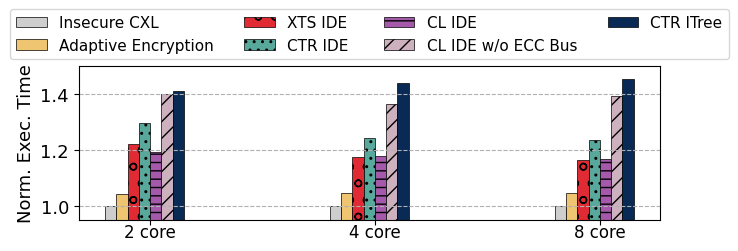

In [1]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=3
x=np.arange(N) 
xclicks=[
    '2 core', '4 core', '8 core'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="avg.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(7, 3)
print(b1)


allfigsize=(7.5,2)     
width=0.05
plt.figure(figsize=allfigsize)

i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*1, b1[0], width, label='w Pre. GCM & Adapt. Encryption', color='#f0c571',hatch="//", edgecolor='black', linewidth=0.5) 
# plt.bar(x , b1[1], width, label='w/o Pre. GCM', color='#a559aa', hatch="x", edgecolor='black', linewidth=0.5)
# plt.bar(x + width*1, b1[2], width, label='w/o Adapt. Encryption',color='#59a89c', hatch="." , edgecolor='black', linewidth=0.5)
off = 7.0 / 2
plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL',color='#cecece', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE', color='#e02b35', hatch="o",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE ', color='#59a89c',  hatch="..", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE',  color='#a559aa', hatch="--", edgecolor='black', linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o ECC Bus', color='#CEB1BE', hatch="//",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR ITree', color='#082a54', edgecolor='black', linewidth=0.5, align='center')



########################################################

########################################################

# plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x + width*(j() - off), b1[i()], width, label='Integrity Tree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')





plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, va='center_baseline') 
#plt.ylim(0,180000)
plt.ylim(0.95,  1.5)
plt.yticks([1.0,1.2,1.4],fontsize=13)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=13)    
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.50, 1.42), fontsize=11)    
plt.savefig('avg.pdf',bbox_inches = 'tight')    
plt.show()